In [1]:
from preprocessing import readcounts_processing_pipeline, pheno_processing_pipeline
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import numpy as np
load_dotenv()
root = os.environ.get("root_folder")

In [4]:
pheno_df_train = pd.read_csv(root + '/train/pheno_training.csv')
pheno_df_train.describe()

pheno_df_test = pd.read_csv(root +  '/test/pheno_test.csv')


In [5]:
from preprocessing import check_data
imputation = 'delete'
pheno_df_train = check_data(pheno_df_train, True, imputation)
pheno_df_test = check_data(pheno_df_test, False, imputation)

Column BodyMassIndex has 1 missing values
Column Smoking has 16 missing values
Column PrevalentDiabetes has 51 missing values
Column PrevalentCHD has 51 missing values
Column PrevalentHFAIL has 51 missing values
Column Event has 51 missing values
Column Event_time has 51 missing values
Column NonHDLcholesterol has 7 missing values
Deleted 75 rows with missing values
Column Smoking has 11 missing values
Column PrevalentDiabetes has 30 missing values
Column PrevalentCHD has 30 missing values
Column PrevalentHFAIL has 30 missing values
Column Event has 30 missing values
Column Event_time has 30 missing values
Column SystolicBP has 1 missing values
Column NonHDLcholesterol has 3 missing values
Deleted 45 rows with missing values


TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

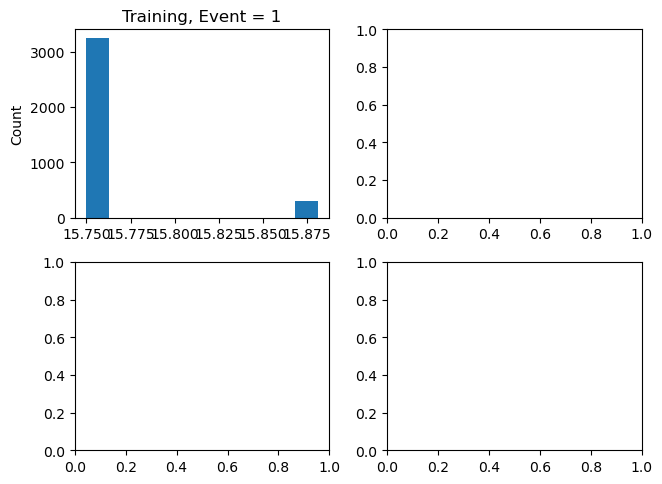

In [6]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2)
fig.tight_layout() 
axs[0, 0].hist(pheno_df_train.loc[pheno_df_train.Event].Event_time)
axs[0, 0].set_title("Training, Event = 1")
axs[0, 0].set_ylabel('Count')

axs[0, 1].hist(pheno_df_train.loc[~pheno_df_train.Event].Event_time)
axs[0, 1].set_title("Training, Event = 0")

axs[1, 0].hist(pheno_df_test.loc[pheno_df_test.Event].Event_time)
axs[1, 0].set_title("Test, Event = 1")
axs[1, 0].set_xlabel('Time (years)')
axs[1, 0].set_ylabel('Count')

axs[1, 1].hist(pheno_df_test.loc[~pheno_df_test.Event].Event_time)
axs[1, 1].set_title("Test, Event = 0")
axs[1, 1].set_xlabel('Time (years)')

- 2.6% of the patients in the cohort previously experienced HF.
- 8.4% of the patients have experienced HF after baseline

Note that the Event corresponds to HF after baseline ("excluding those occur before baseline" )

### Check that all patients with PrevalentHFAIL = 1 indeed have Event_time <0

In [63]:
(pheno_df_train["PrevalentHFAIL"] == 1).sum()

93

93 patients experienced HF before the baseline

In [64]:
(pheno_df_train["Event_time"] < 0).sum()

93

In [65]:
((pheno_df_train["Event_time"] < 0) & (pheno_df_train["PrevalentHFAIL"] == 1)).sum()  

93

### Check that all patients with Event_time <0 (that is, PrevalentHFAIL == 1) have Event == 0

In [66]:
artifacts = (pheno_df_train["Event_time"] < 0) & (pheno_df_train["Event"] == 1) 
artifacts.sum() 

7

This is an artifact from the simulation (see discussion on the challenge page)

In [67]:
pheno_df_train = pheno_processing_pipeline(pheno_df_train)
pheno_df_test = pheno_processing_pipeline(pheno_df_test)
pheno_df_train

,Age,BodyMassIndex,Smoking=1,BPTreatment=1,PrevalentDiabetes=1,PrevalentCHD=1,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex=1
Simulated_328,53.618,24.127,0.0,0.0,0.0,0.0,False,15.75,133.077,3.02,0.0
Simulated_1644,36.811,27.992,0.0,0.0,0.0,0.0,False,15.881,108.914,5.48,0.0
Simulated_1710,49.429,23.664,0.0,0.0,0.0,0.0,False,15.891,110.064,4.388,1.0
Simulated_1732,48.842,26.804,0.0,0.0,0.0,0.0,False,15.918,128.059,5.119,0.0
Simulated_1727,60.738,29.862,0.0,0.0,0.0,0.0,False,15.841,169.913,5.74,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1783,33.802,37.049,0.0,0.0,0.0,0.0,False,15.942,109.08,3.141,0.0
Simulated_3425,69.249,36.8,0.0,0.0,1.0,0.0,False,15.781,145.953,5.478,1.0
Simulated_1789,28.561,26.463,0.0,0.0,0.0,0.0,False,12.198,124.091,4.87,1.0
Simulated_1592,70.278,31.945,0.0,1.0,0.0,0.0,False,15.609,142.038,2.492,0.0


- BPTreatment = Blood pressure treatment
- Prevalent CHD = Prevalent coronary heart disease

### Check that training set and test set do not intersect

In [68]:
pheno_df_train

,Age,BodyMassIndex,Smoking=1,BPTreatment=1,PrevalentDiabetes=1,PrevalentCHD=1,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex=1
Simulated_328,53.618,24.127,0.0,0.0,0.0,0.0,False,15.75,133.077,3.02,0.0
Simulated_1644,36.811,27.992,0.0,0.0,0.0,0.0,False,15.881,108.914,5.48,0.0
Simulated_1710,49.429,23.664,0.0,0.0,0.0,0.0,False,15.891,110.064,4.388,1.0
Simulated_1732,48.842,26.804,0.0,0.0,0.0,0.0,False,15.918,128.059,5.119,0.0
Simulated_1727,60.738,29.862,0.0,0.0,0.0,0.0,False,15.841,169.913,5.74,1.0
...,...,...,...,...,...,...,...,...,...,...,...
Simulated_1783,33.802,37.049,0.0,0.0,0.0,0.0,False,15.942,109.08,3.141,0.0
Simulated_3425,69.249,36.8,0.0,0.0,1.0,0.0,False,15.781,145.953,5.478,1.0
Simulated_1789,28.561,26.463,0.0,0.0,0.0,0.0,False,12.198,124.091,4.87,1.0
Simulated_1592,70.278,31.945,0.0,1.0,0.0,0.0,False,15.609,142.038,2.492,0.0


In [69]:
# Calling merge() function
int_df = pd.merge(pheno_df_train, pheno_df_test, how ='inner')
print(int_df)

Empty DataFrame
Columns: [Age, BodyMassIndex, Smoking=1, BPTreatment=1, PrevalentDiabetes=1, PrevalentCHD=1, Event, Event_time, SystolicBP, NonHDLcholesterol, Sex=1]
Index: []


In [70]:
import scipy.stats  as stats
crosstab = pd.crosstab(pheno_df_train['Smoking=1'], pheno_df_train['Event'])
crosstab

Event,False,True
Smoking=1,,
0.0,2466,237
1.0,776,54


In [71]:
stats.chi2_contingency(crosstab)

(4.004770759834942,
 0.04537166672982941,
 1,
 array([[2480.3639966,  222.6360034],
        [ 761.6360034,   68.3639966]]))

In [72]:
crosstab = pd.crosstab(pheno_df_train['BPTreatment=1'], pheno_df_train['Event'])
crosstab

Event,False,True
BPTreatment=1,,
0.0,2744,238
1.0,498,53


In [73]:
stats.chi2_contingency(crosstab)

(1.440657585407854,
 0.23003295848132235,
 1,
 array([[2736.38380979,  245.61619021],
        [ 505.61619021,   45.38380979]]))

In [74]:
crosstab = pd.crosstab(pheno_df_train['PrevalentDiabetes=1'], pheno_df_train['Event'])
crosstab

Event,False,True
PrevalentDiabetes=1,,
0.0,3042,271
1.0,200,20


In [75]:
stats.chi2_contingency(crosstab)

(0.1220324869519188,
 0.7268404633320662,
 1,
 array([[3040.12057741,  272.87942259],
        [ 201.87942259,   18.12057741]]))

In [76]:
crosstab = pd.crosstab(pheno_df_train['Sex=1'], pheno_df_train['Event'])
crosstab

Event,False,True
Sex=1,,
0.0,1808,156
1.0,1434,135


In [77]:
stats.chi2_contingency(crosstab)

(0.4208648156826076,
 0.5165058332263577,
 1,
 array([[1802.23266346,  161.76733654],
        [1439.76733654,  129.23266346]]))

In [78]:
crosstab = pd.crosstab(pheno_df_train['PrevalentCHD=1'], pheno_df_train['Event'])
crosstab

Event,False,True
PrevalentCHD=1,,
0.0,3142,274
1.0,100,17


In [79]:
stats.chi2_contingency(crosstab)

(5.508937562618371,
 0.018919536180906665,
 1,
 array([[3134.63685253,  281.36314747],
        [ 107.36314747,    9.63685253]]))

In [80]:
from sklearn.linear_model import LogisticRegression

lgc = LogisticRegression().fit(pheno_df_train['BodyMassIndex'].to_numpy().reshape(-1,1), pheno_df_train['Event'])
 

### Are some participants censored for other reasons than study end? 

In [81]:
y = np.concatenate([pheno_df_train.Event_time,pheno_df_train.Event_time])
times = np.percentile(y, np.linspace(5, 95, 15)) #We set the upper bound to the 95% percentile of observed time points, because the censoring rate is quite large at 91.5%.

tau = times[-1]

Text(0.5, 23.52222222222222, 'Time (years)')

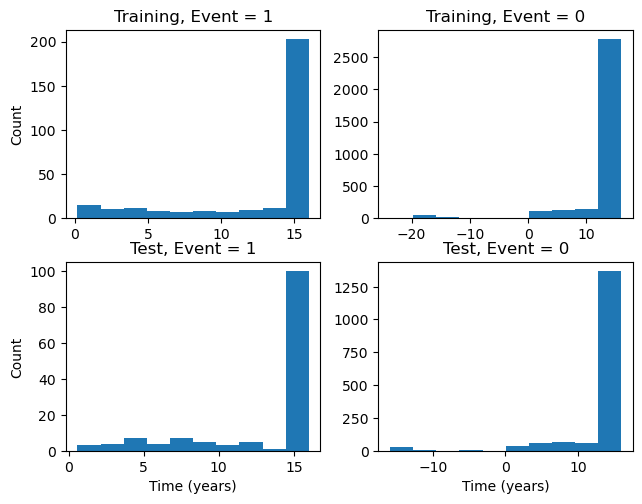

In [109]:
# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2)
fig.tight_layout() 
axs[0, 0].hist(pheno_df_train.loc[pheno_df_train.Event].Event_time)
axs[0, 0].set_title("Training, Event = 1")
axs[0, 0].set_ylabel('Count')

axs[0, 1].hist(pheno_df_train.loc[~pheno_df_train.Event].Event_time)
axs[0, 1].set_title("Training, Event = 0")

axs[1, 0].hist(pheno_df_test.loc[pheno_df_test.Event].Event_time)
axs[1, 0].set_title("Test, Event = 1")
axs[1, 0].set_xlabel('Time (years)')
axs[1, 0].set_ylabel('Count')

axs[1, 1].hist(pheno_df_test.loc[~pheno_df_test.Event].Event_time)
axs[1, 1].set_title("Test, Event = 0")
axs[1, 1].set_xlabel('Time (years)')

In [84]:
from preprocessing import check_data
imputation = 'delete'
check_data(pheno_df_train, True, imputation)
pheno_df_test = check_data(pheno_df_test, False, imputation)

Number of rows with missing values: 0
Please provide an imputation method
Number of rows with missing values: 0
Please provide an imputation method


### Check that training and test sets have similar characteristics

In [90]:
 pheno_df_train.Event_time.max()

16.0

(array([[3.56399771e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         0.00000000e+00, 1.81763883e-02, 3.56399771e-03, 7.12799543e-04,
         0.00000000e+00, 3.56399771e-04, 0.00000000e+00, 3.56399771e-04,
         3.56399771e-04, 3.56399771e-04, 1.06919931e-03, 1.06919931e-03,
         7.12799543e-04, 3.56399771e-04, 1.06919931e-03, 3.56399771e-04,
         3.56399771e-04, 0.00000000e+00, 3.56399771e-04, 0.00000000e+00,
         3.56399771e-04, 3.56399771e-04, 7.48439520e-03, 1.28303918e-02,
         1.03355934e-02, 8.55359451e-03, 1.24739920e-02, 1.35431913e-02,
         9.97919360e-03, 7.84079497e-03, 1.28303918e-02, 7.12799543e-03,
         1.14047927e-02, 1.28303918e-02, 1.03355934e-02, 1.17611925e-02,
         9.26639405e-03, 1.31867915e-02, 1.14047927e-02, 1.92455876e-02,
         1.24739920e-02, 1.01395735e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         

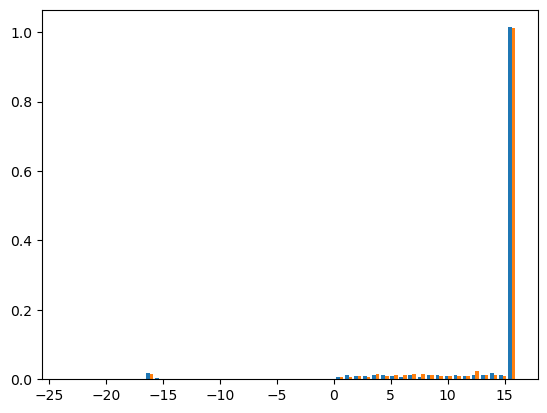

In [91]:
import numpy as np
y_train = pheno_df_train.Event_time.loc[pheno_df_train.Event_time < np.inf]  
y_test = pheno_df_test.Event_time.loc[pheno_df_test.Event_time < np.inf]  
plt.hist([y_train, y_test], bins=50, label=['train', 'test'], density=True)

In [92]:
df = pheno_df_test.copy()

nan_cols= df.isnull() 

In [93]:
nan_cols.sum()

Age                    0
BodyMassIndex          0
Smoking=1              0
BPTreatment=1          0
PrevalentDiabetes=1    0
PrevalentCHD=1         0
Event                  0
Event_time             0
SystolicBP             0
NonHDLcholesterol      0
Sex=1                  0
dtype: int64

In [94]:
df.shape[0] -  df.dropna().shape[0]

0

In [95]:
 

if np.any(np.isnan(preds_test)) or np.any(np.isinf(preds_test)):
    raise ValueError('Predictions contain invalid values (NaN or inf)')


NameError: name 'preds_test' is not defined

Number of rows with missing values: 0
Please provide an imputation method
Column Smoking has 11 missing values
Column PrevalentDiabetes has 30 missing values
Column PrevalentCHD has 30 missing values
Column PrevalentHFAIL has 30 missing values
Column Event has 30 missing values
Column Event_time has 30 missing values
Column SystolicBP has 1 missing values
Column NonHDLcholesterol has 3 missing values
Number of rows with missing values: 45
Please provide an imputation method


,Unnamed: 0,Age,BodyMassIndex,Smoking,BPTreatment,PrevalentDiabetes,PrevalentCHD,PrevalentHFAIL,Event,Event_time,SystolicBP,NonHDLcholesterol,Sex
0,Simulated_2211,73.860,30.140,1.0,1,0.0,0.0,0.0,0.0,15.910,154.046,5.010,0
1,Simulated_1629,48.070,18.252,1.0,0,0.0,0.0,0.0,0.0,11.189,184.064,3.922,0
2,Simulated_1690,49.060,25.911,0.0,0,0.0,0.0,0.0,1.0,15.832,126.922,5.119,1
3,Simulated_1367,58.499,25.739,0.0,0,0.0,0.0,0.0,0.0,15.818,141.003,3.890,1
4,Simulated_3387,47.242,29.227,0.0,0,0.0,0.0,0.0,0.0,15.782,143.021,3.611,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1804,Simulated_1628,56.091,25.580,1.0,0,0.0,0.0,1.0,0.0,-10.830,169.903,4.480,1
1805,Simulated_3424,46.889,22.762,0.0,0,0.0,0.0,0.0,0.0,15.940,122.995,3.669,0
1806,Simulated_2215,70.841,24.808,0.0,0,0.0,0.0,0.0,0.0,3.542,190.934,6.069,1
1807,Simulated_3426,25.920,20.520,0.0,0,0.0,0.0,0.0,0.0,15.901,117.032,2.789,1
